In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing.image import load_img
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from keras.layers import *

In [2]:
import kagglehub

In [3]:
path = kagglehub.dataset_download("jangedoo/utkface-new")

print("Path to dataset files:", path)

100%|██████████| 331M/331M [00:08<00:00, 39.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1


In [4]:
files_in_dataset = os.listdir(path)
print(f"Files in dataset: {files_in_dataset}")

Files in dataset: ['UTKFace', 'utkface_aligned_cropped', 'crop_part1']


In [5]:
os.listdir(path)

['UTKFace', 'utkface_aligned_cropped', 'crop_part1']

In [6]:
if 'UTKFace' in files_in_dataset:
  print('UTKFace is found in the data set')
  utkface_path = os.path.join(path,'UTKFace')
  print(utkface_path)
  utkface_files = os.listdir(utkface_path)
  #print(utkface_files)
  print(f'files in UTKFace: {utkface_files[:5]}')
  print(f'Total no of files in UTKFace: {len(utkface_files)}')
else:
  print('UTKFace directory is not found in dataset')

UTKFace is found in the data set
/root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1/UTKFace
files in UTKFace: ['10_0_0_20170110225402690.jpg.chip.jpg', '45_0_2_20170116164410975.jpg.chip.jpg', '35_0_0_20170117172025987.jpg.chip.jpg', '26_0_3_20170119181013021.jpg.chip.jpg', '25_0_0_20170113210127416.jpg.chip.jpg']
Total no of files in UTKFace: 23708


In [7]:
image_paths = []
age = []
genders = []

if 'utkface_path' in locals() and os.path.exists(utkface_path):
  for filename in os.listdir(utkface_path):
    try:
      parts = filename.split('_')
      if len(parts) >=3:
        image_paths.append(os.path.join(utkface_path,filename))
        age.append(int(parts[0]))
        genders.append(int(parts[1]))
    except(ValueError,IndexError):
        print(f'Skipping file {filename} due to invalid format')
        continue

else:
  print('utkface_path is not defined or the directory does not exist')


In [8]:
for i in range(3):
  print(f'image path : {image_paths[i]}')
  print(f'age : {age[i]}')
  print(f'gender : {genders[i]}')

image path : /root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1/UTKFace/10_0_0_20170110225402690.jpg.chip.jpg
age : 10
gender : 0
image path : /root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1/UTKFace/45_0_2_20170116164410975.jpg.chip.jpg
age : 45
gender : 0
image path : /root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1/UTKFace/35_0_0_20170117172025987.jpg.chip.jpg
age : 35
gender : 0


In [9]:
len(image_paths)

23708

In [10]:
df = pd.DataFrame(
    {'ImagePath': image_paths,
     'Age' : age,
     'Gender' : genders}
)

In [11]:
df.head()

,ImagePath,Age,Gender
0,/root/.cache/kagglehub/datasets/jangedoo/utkfa...,10,0
1,/root/.cache/kagglehub/datasets/jangedoo/utkfa...,45,0
2,/root/.cache/kagglehub/datasets/jangedoo/utkfa...,35,0
3,/root/.cache/kagglehub/datasets/jangedoo/utkfa...,26,0
4,/root/.cache/kagglehub/datasets/jangedoo/utkfa...,25,0


Age: 47
Gender: 1


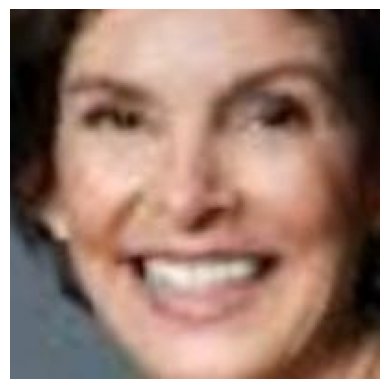

In [12]:
from PIL import Image
img = Image.open(df['ImagePath'][1000])
plt.axis('off')
plt.imshow(img)
print(f"Age: {df['Age'][1000]}")
print(f"Gender: {df['Gender'][1000]}")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ImagePath  23708 non-null  object
 1   Age        23708 non-null  int64 
 2   Gender     23708 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 555.8+ KB


In [14]:
df.describe()

,Age,Gender
count,23708.000000,23708.000000
mean,33.303484,0.477349
std,19.886112,0.499497
min,1.000000,0.000000
25%,23.000000,0.000000
50%,29.000000,0.000000
75%,45.000000,1.000000
max,116.000000,1.000000


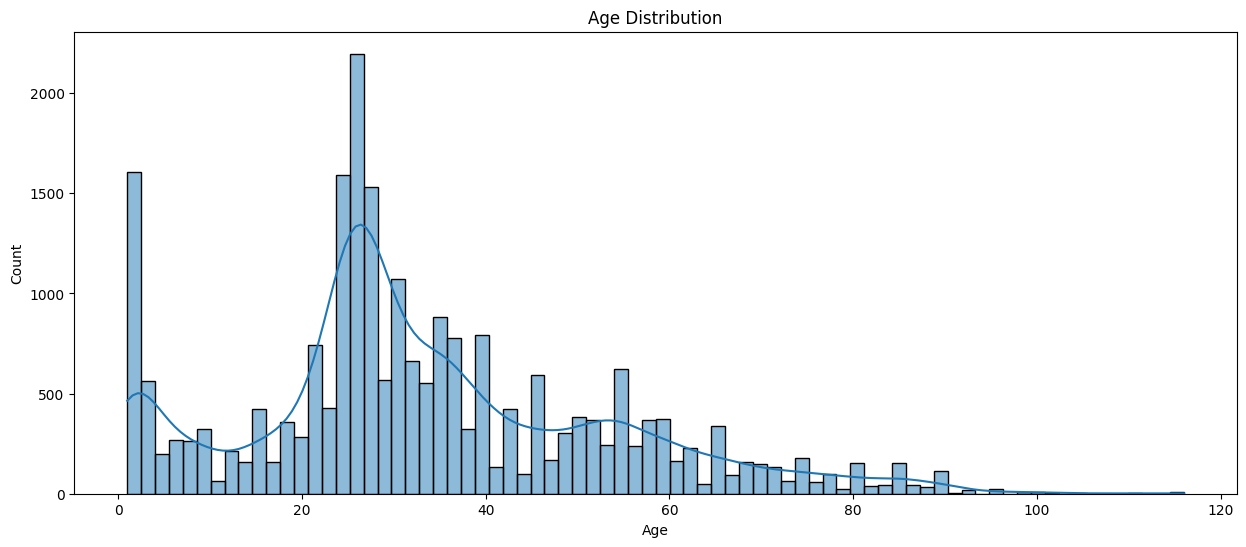

In [15]:
plt.figure(figsize = (15,6))
sns.histplot(df['Age'],kde = True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

In [16]:
gender_dict = {0: 'Male',1:'Female'}

In [17]:
df = df.astype({'Age':'float32','Gender' : 'int32'})

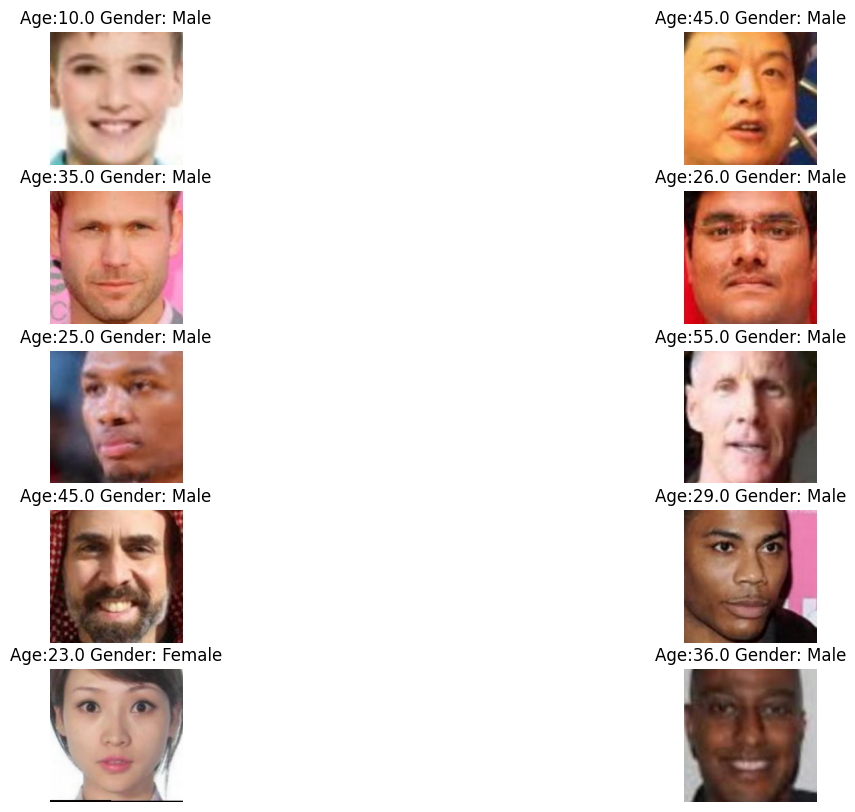

In [18]:
plt.figure(figsize = (15,10))
file = df.iloc[:10]

for index,file,Age,Gender in file.itertuples():
  plt.subplot(5,2,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title(f'Age:{Age} Gender: {gender_dict[Gender]}')
  plt.axis('off')

In [19]:
import cv2

In [20]:
df['ImagePath'][0]

'/root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1/UTKFace/10_0_0_20170110225402690.jpg.chip.jpg'

In [21]:
def extract_features(ImagePath):
  img = cv2.imread(ImagePath)
  img = cv2.resize(img,(128,128))

  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img

In [22]:
df['features'] = df['ImagePath'].apply(extract_features)

array([[[ 47,  65,  82],
        [ 40,  58,  75],
        [ 34,  53,  70],
        ...,
        [ 74,  88, 106],
        [ 94, 109, 122],
        [134, 147, 160]],

       [[ 47,  65,  82],
        [ 40,  57,  75],
        [ 34,  52,  71],
        ...,
        [ 72,  86, 104],
        [ 90, 106, 119],
        [128, 142, 155]],

       [[ 46,  63,  81],
        [ 39,  56,  75],
        [ 34,  51,  71],
        ...,
        [ 68,  83, 100],
        [ 85, 101, 114],
        [120, 134, 146]],

       ...,

       [[220, 219, 161],
        [209, 208, 149],
        [202, 199, 135],
        ...,
        [247, 252, 251],
        [246, 251, 250],
        [244, 249, 248]],

       [[211, 211, 146],
        [204, 203, 135],
        [201, 198, 126],
        ...,
        [247, 252, 251],
        [246, 251, 250],
        [244, 249, 248]],

       [[204, 205, 133],
        [202, 200, 127],
        [201, 198, 119],
        ...,
        [247, 252, 251],
        [246, 251, 250],
        [244, 249, 248]]], dtype=uint8)
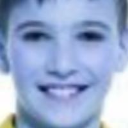

In [23]:
df['features'][0]

In [24]:
len(df['features'][0])

128

In [25]:
df['features'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23708 entries, 0 to 23707
Series name: features
Non-Null Count  Dtype 
--------------  ----- 
23708 non-null  object
dtypes: object(1)
memory usage: 185.3+ KB


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ImagePath  23708 non-null  object 
 1   Age        23708 non-null  float32
 2   Gender     23708 non-null  int32  
 3   features   23708 non-null  object 
dtypes: float32(1), int32(1), object(2)
memory usage: 555.8+ KB


In [27]:
X = df.drop(['ImagePath','Age','Gender'],axis = 1)

In [28]:
X.head(1).shape

(1, 1)

In [29]:
y_age = df['Age']
y_Gender = df['Gender']

In [30]:
X.shape

(23708, 1)

In [31]:
y_age.shape

(23708,)

In [32]:
y_Gender.shape

(23708,)

In [33]:
X = np.stack(df['features'].values)

In [34]:
X.shape

(23708, 128, 128, 3)

In [35]:
y_age = np.array(y_age)
y_gender = np.array(y_Gender)

In [36]:
print(y_age.shape)
print(y_gender.shape)

(23708,)
(23708,)


In [37]:
print(np.any(np.isnan(X)))
print(np.any(np.isinf(X)))
#print(X_reshaped.dtype)

False
False


In [38]:
X.tofile('X_large.dat')

In [39]:
X_mm = np.memmap('X_large.dat', dtype='uint8', mode='r', shape=(23708, 128, 128, 3))


In [40]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import h5py

height = 128
width = 128
channels = 3
batch_size = 10
num_samples = X_mm.shape[0]

scaler = StandardScaler()

with h5py.File("scaled_data.h5", "w") as f:
    dataset = f.create_dataset("scaled_data", (num_samples, height, width, channels), dtype='float32')

    for start_idx in range(0, num_samples, batch_size):
        end_idx = min(start_idx + batch_size, num_samples)
        batch = X_mm[start_idx:end_idx]

        print(f"Processing batch from index {start_idx} to {end_idx}, batch size: {batch.shape[0]}")

        if batch.shape[0] < batch_size:
            print(f"Last batch with fewer samples: {batch.shape[0]} samples")

        batch = batch.astype('float32')
        batch_reshaped = batch.reshape(batch.shape[0], -1)
        scaled_batch = scaler.fit_transform(batch_reshaped)

        dataset[start_idx:end_idx] = scaled_batch.reshape(batch.shape[0], height, width, channels)

        print(f"Batch processed and saved from index {start_idx} to {end_idx}")

with h5py.File("scaled_data.h5", "r") as f:
    scaled_data = f["scaled_data"]

    print(f"Final shape of the scaled data in HDF5 file: {scaled_data.shape}")

print("Scaling completed and batches saved to HDF5 file.")


Processing batch from index 0 to 10, batch size: 10
Batch processed and saved from index 0 to 10
Processing batch from index 10 to 20, batch size: 10
Batch processed and saved from index 10 to 20
Processing batch from index 20 to 30, batch size: 10
Batch processed and saved from index 20 to 30
Processing batch from index 30 to 40, batch size: 10
Batch processed and saved from index 30 to 40
Processing batch from index 40 to 50, batch size: 10
Batch processed and saved from index 40 to 50
Processing batch from index 50 to 60, batch size: 10
Batch processed and saved from index 50 to 60
Processing batch from index 60 to 70, batch size: 10
Batch processed and saved from index 60 to 70
Processing batch from index 70 to 80, batch size: 10
Batch processed and saved from index 70 to 80
Processing batch from index 80 to 90, batch size: 10
Batch processed and saved from index 80 to 90
Processing batch from index 90 to 100, batch size: 10
Batch processed and saved from index 90 to 100
Processing

In [41]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import h5py


height = 128
width = 128
channels = 3
batch_size = 10
num_samples = 23708

scaler = StandardScaler()

with h5py.File("scaled_data.h5", "w") as f:

    dataset = f.create_dataset("scaled_data", (num_samples, height, width, channels), dtype='float32')

    for start_idx in range(0, num_samples, batch_size):
        end_idx = min(start_idx + batch_size, num_samples)
        batch = X_mm[start_idx:end_idx]

        print(f"Processing batch from index {start_idx} to {end_idx}, batch size: {batch.shape[0]}")

        if batch.shape[0] < batch_size:
            print(f"Last batch with fewer samples: {batch.shape[0]} samples")

        batch = batch.astype('float32')
        batch_reshaped = batch.reshape(batch.shape[0], -1)


        scaled_batch = scaler.fit_transform(batch_reshaped)

        dataset[start_idx:end_idx] = scaled_batch.reshape(batch.shape[0], height, width, channels)

        print(f"Batch processed and saved from index {start_idx} to {end_idx}")

print("All batches processed and saved to HDF5 file.")


Processing batch from index 0 to 10, batch size: 10
Batch processed and saved from index 0 to 10
Processing batch from index 10 to 20, batch size: 10
Batch processed and saved from index 10 to 20
Processing batch from index 20 to 30, batch size: 10
Batch processed and saved from index 20 to 30
Processing batch from index 30 to 40, batch size: 10
Batch processed and saved from index 30 to 40
Processing batch from index 40 to 50, batch size: 10
Batch processed and saved from index 40 to 50
Processing batch from index 50 to 60, batch size: 10
Batch processed and saved from index 50 to 60
Processing batch from index 60 to 70, batch size: 10
Batch processed and saved from index 60 to 70
Processing batch from index 70 to 80, batch size: 10
Batch processed and saved from index 70 to 80
Processing batch from index 80 to 90, batch size: 10
Batch processed and saved from index 80 to 90
Processing batch from index 90 to 100, batch size: 10
Batch processed and saved from index 90 to 100
Processing

In [42]:
from keras.models import Model

In [43]:
def build_cnn_model(input_shape):
  inputs = Input(shape = input_shape)

  x = Conv2D(32,(3,3),activation = 'relu')(inputs)
  x = MaxPooling2D((2,2))(x)
  x = Conv2D(64,(3,3),activation = 'relu')(x)
  x = MaxPooling2D((2,2))(x)
  x = Conv2D(128,(3,3),activation = 'relu')(x)
  x = MaxPooling2D((2,2))(x)
  x = Conv2D(256,(3,3),activation = 'relu')(x)
  x = MaxPooling2D((2,2))(x)

  x = Flatten()(x)

  x_age = Dense(128,activation = 'relu')(x)
  output_age = Dense(1,activation = 'sigmoid',name = 'age')(x_age)

  x_gender = Dense(64,activation  = 'relu')(x)
  output_gender = Dense(1,activation = 'sigmoid',name = 'gender')(x_gender)

  model = Model(inputs = inputs,outputs = [output_age,output_gender])

  return model


In [44]:
input_shape = X.shape[1:]
model = build_cnn_model(input_shape)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 126, 126, 32)   │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 63, 63, 32)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 61, 61, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 30, 30, 64)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 28, 28, 128)    │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 14, 14, 128)    │              0 │ conv2d_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 12, 12, 256)    │        295,168 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 6, 6, 256)      │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 9216)           │              0 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │      1,179,776 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │        589,888 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ age (Dense)               │ (None, 1)              │            129 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gender (Dense)            │ (None, 1)              │             65 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,158,274 (8.23 MB)

 Trainable params: 2,158,274 (8.23 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(optimizer = 'adam',loss = {'age':'mse','gender':'binary_crossentropy'},metrics = {'age':'mae','gender':'accuracy'})

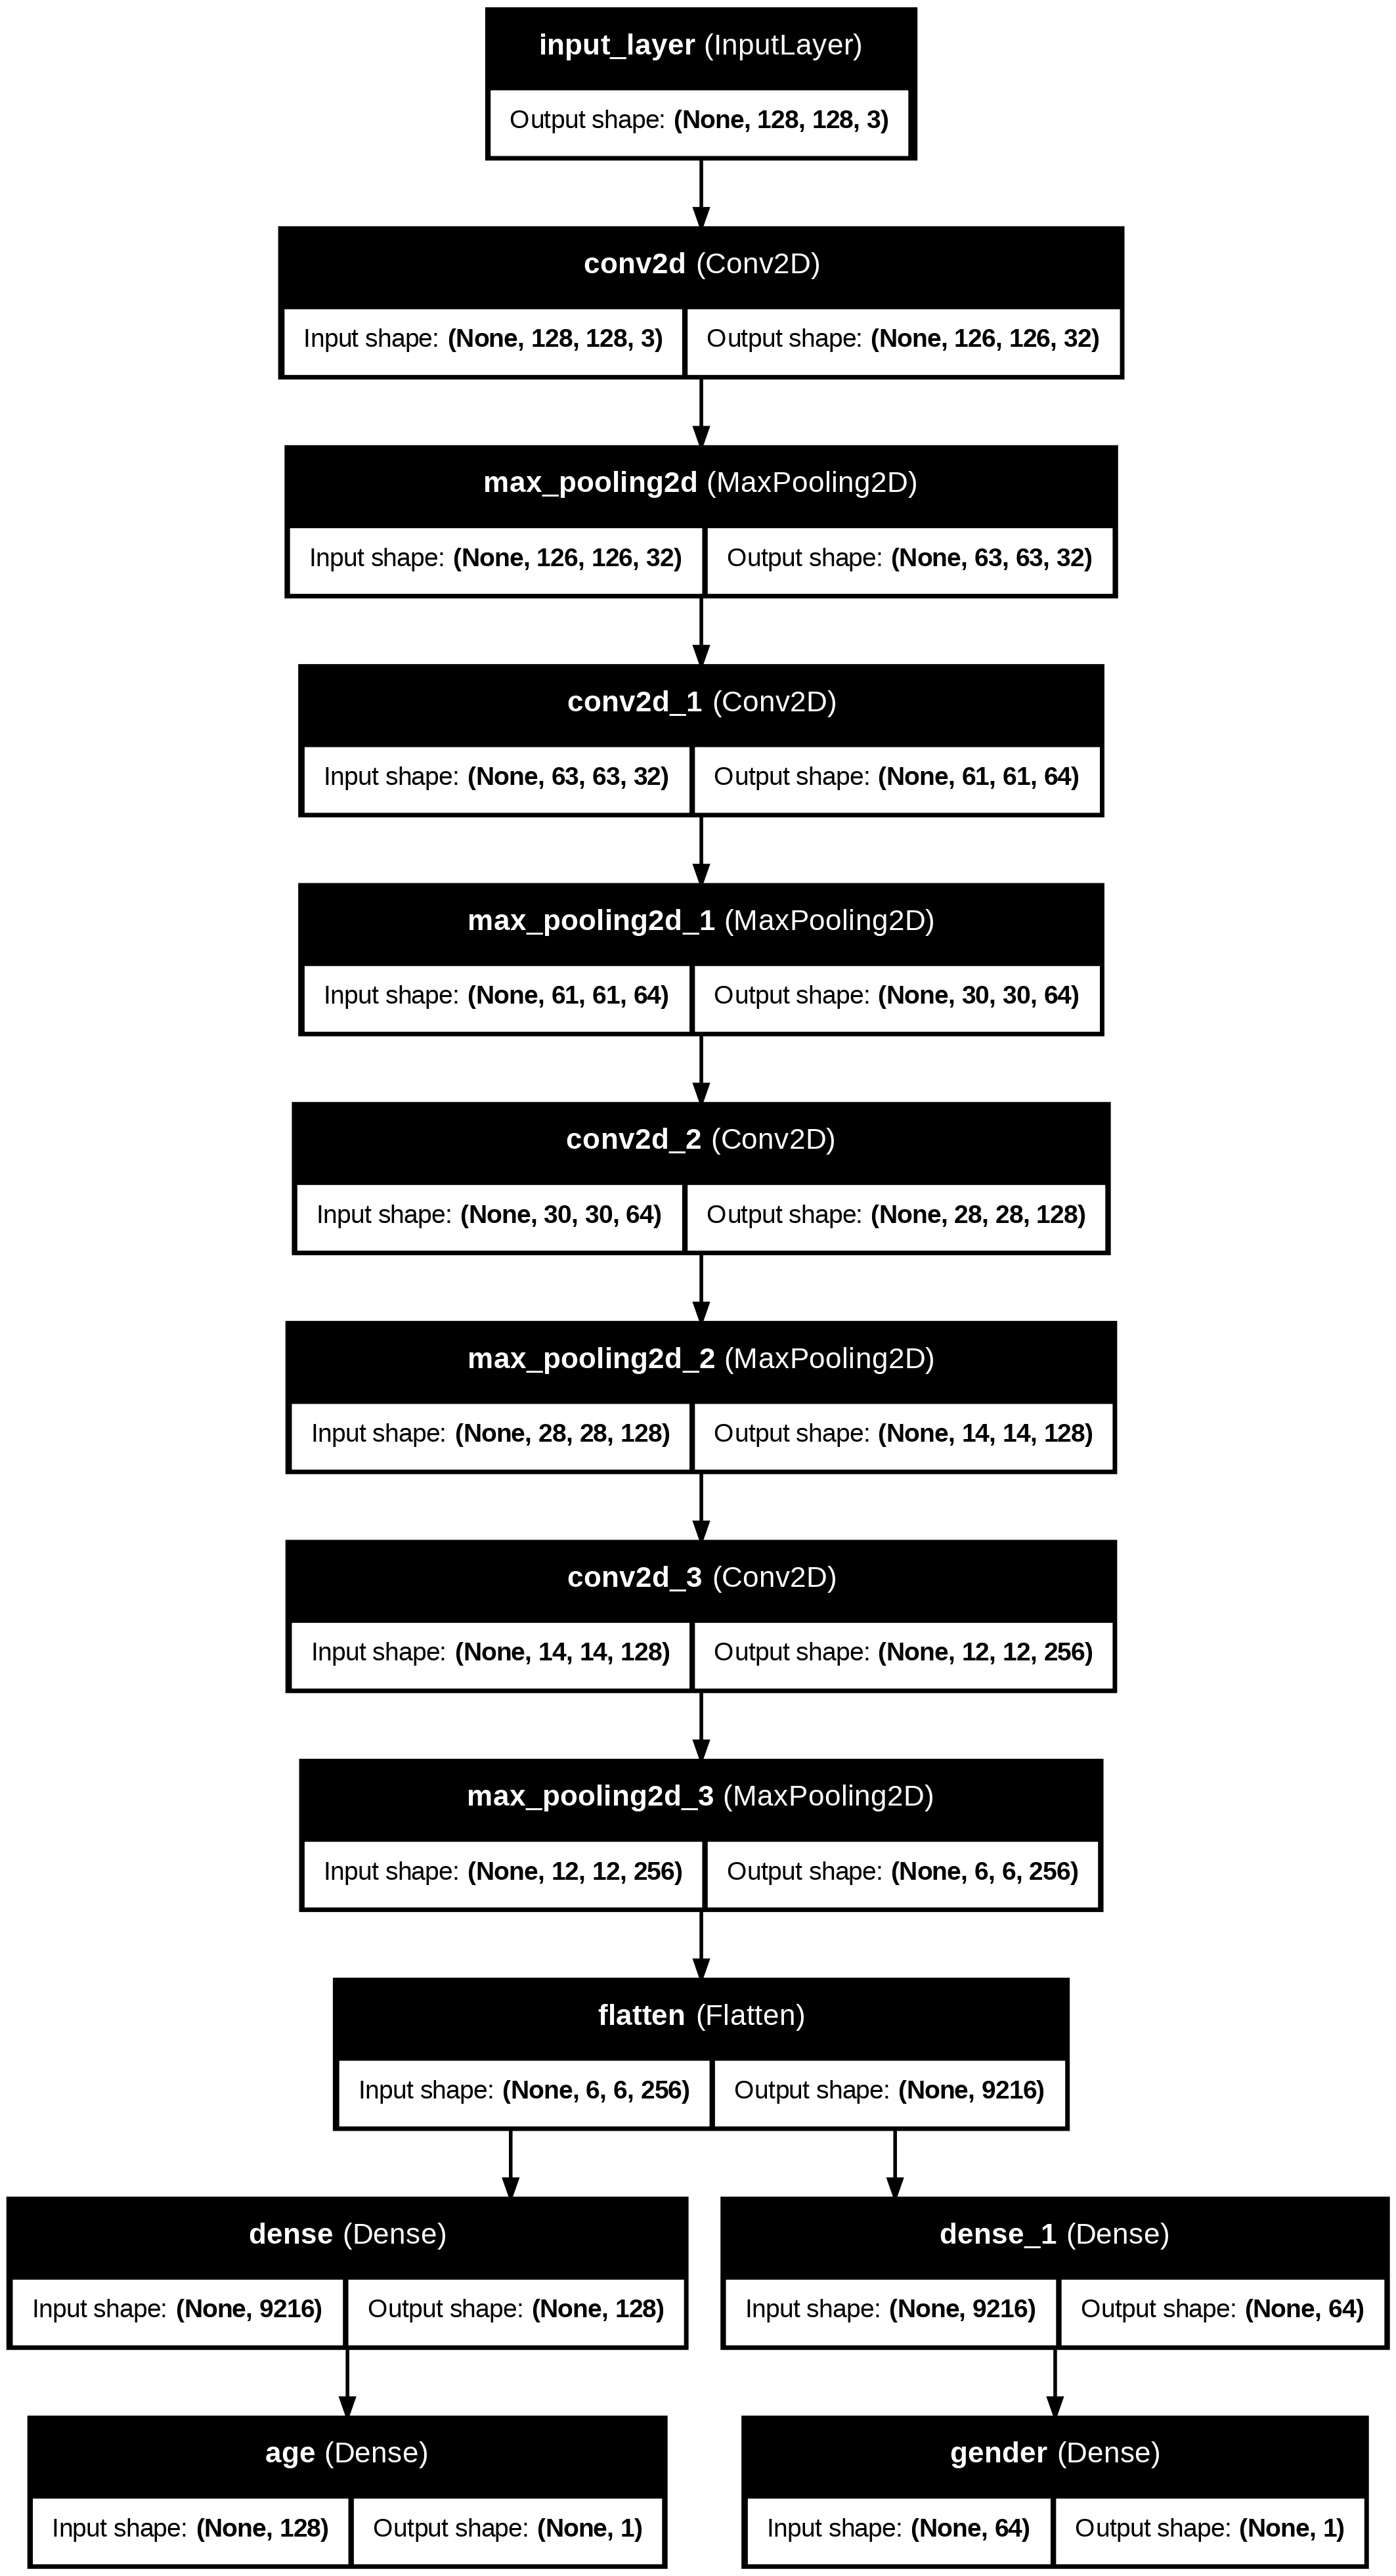

In [46]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file = 'model_plot.png',show_shapes = True,show_layer_names = True)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_age_train, y_age_val, y_gender_train, y_gender_val = train_test_split(
    X, y_age, y_gender, test_size=0.2, random_state=42)


In [48]:
history = model.fit(
    X_train,
    {'age': y_age_train, 'gender': y_gender_train},
    validation_data=(X_val, {'age': y_age_val, 'gender': y_gender_val}),
    epochs=50,
    batch_size=32)

Epoch 1/50
593/593 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - age_loss: 1426.9486 - age_mae: 32.0303 - gender_accuracy: 0.7267 - gender_loss: 2.3954 - loss: 1429.3436 - val_age_loss: 1432.0933 - val_age_mae: 32.2543 - val_gender_accuracy: 0.8480 - val_gender_loss: 0.3483 - val_loss: 1432.2267
Epoch 2/50
593/593 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - age_loss: 1439.5640 - age_mae: 32.2713 - gender_accuracy: 0.8627 - gender_loss: 0.3232 - loss: 1439.8875 - val_age_loss: 1432.0933 - val_age_mae: 32.2543 - val_gender_accuracy: 0.8667 - val_gender_loss: 0.3058 - val_loss: 1432.1846
Epoch 3/50
593/593 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - age_loss: 1452.4603 - age_mae: 32.4728 - gender_accuracy: 0.8729 - gender_loss: 0.2954 - loss: 1452.7561 - val_age_loss: 1432.0933 - val_age_mae: 32.2543 - val_gender_accuracy: 0.8754 - val_gender_loss: 0.2724 - val_loss: 1432.1514
Epoch 4/50
593/593 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - age_loss: 1424.5181 - age_mae: 32.1067 - gender_accuracy: 0.8810 - gender_loss: 

<Figure size 640x480 with 0 Axes>

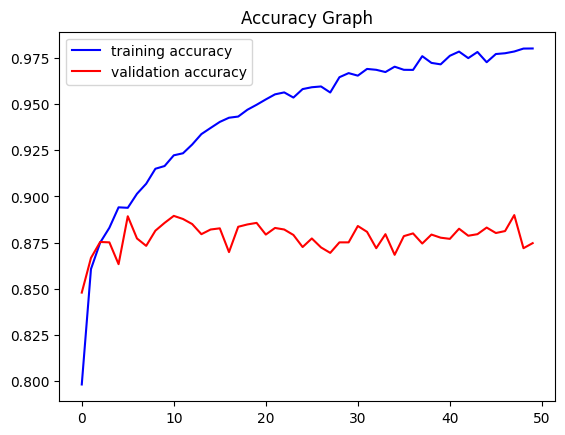

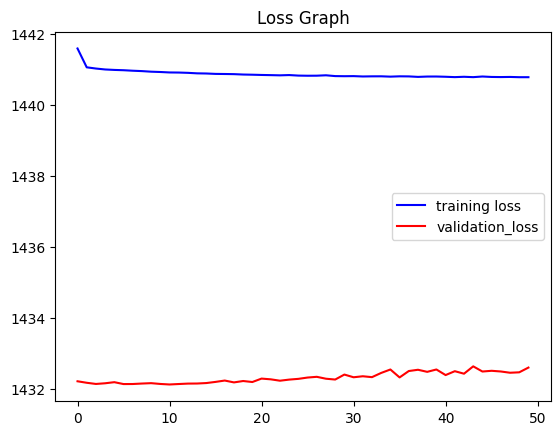

<Figure size 640x480 with 0 Axes>

In [49]:
g_accuracy = history.history['gender_accuracy']
g_val_accuracy = history.history['val_gender_accuracy']
epochs = range(len(g_accuracy))

plt.plot(epochs,g_accuracy,'b',label = 'training accuracy')
plt.plot(epochs,g_val_accuracy,'r',label = 'validation accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

g_loss = history.history['loss']
g_val_loss = history.history['val_loss']

plt.plot(epochs,g_loss,'b',label = 'training loss')
plt.plot(epochs,g_val_loss,'r',label = 'validation_loss')
plt.title('Loss Graph')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

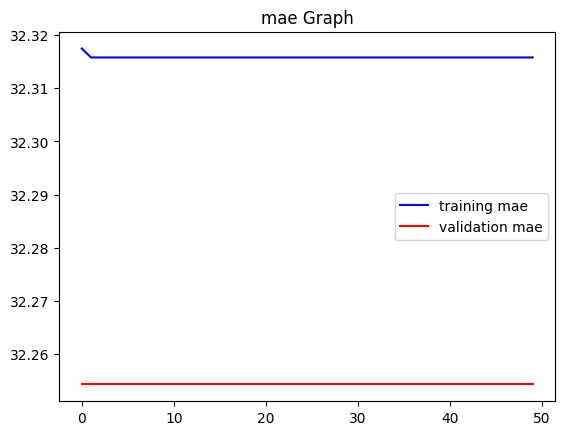

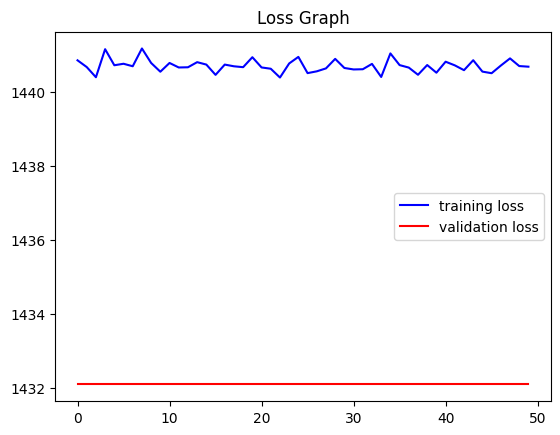

<Figure size 640x480 with 0 Axes>

In [52]:
a_accuracy = history.history['age_mae']
a_test_accuracy = history.history['val_age_mae']
epochs = range(len(a_accuracy))

plt.plot(epochs,a_accuracy,'b',label = 'training mae')
plt.plot(epochs,a_test_accuracy,'r',label = 'validation mae')
plt.title('mae Graph')
plt.legend()
plt.figure()

a_loss = history.history['age_loss']
a_test_loss = history.history['val_age_loss']

plt.plot(epochs,a_loss,'b',label = 'training loss')
plt.plot(epochs,a_test_loss,'r',label = 'validation loss')
plt.title('Loss Graph')
plt.legend()
plt.figure()